# 朴素贝叶斯
## 概述
***贝叶斯分类算法***是一大类分类算法的总称

贝叶斯分类算法以***样本可能属于某类的概率来作为分类依据***

***朴素贝叶斯分类算法***是贝叶斯分类算法中最简单的一种

>注：朴素的意思是条件概率独立性:

>$P\left( {A|{x_1},{x_2},{x_3},{x_4}} \right) = P\left( {A|{x_1},} \right)*P\left( {A|{x_2}} \right)*P\left( {A|{x_3}} \right)*P(A|{x_4})$

>$P\left( {x,y|z} \right) = \frac{P\left( {x,y,z} \right)}{P\left( z \right)} = \frac{P\left( {x,z} \right)}{P\left( z \right)}*\frac{P\left( {y,z} \right)}{P(z)}$

## 算法思想
即如果一个事物在一些属性条件发生的情况下，属于A的概率>属于B的概率，则判定属于A

通俗来说比如，你在街上看到一个黑人，我让你猜这哥们哪里来的，你十有八九猜非洲。为什么呢？

在你的脑海中，有这么一个判断流程：

>1、这个人的肤色是黑色 <特征>

>2、黑色人种是非洲人的概率最高 <条件概率：黑色条件下是非洲人的概率>

>3、没有其他辅助信息的情况下，最好的判断就是非洲人

这就是朴素贝叶斯的思想基础。

## 算法步骤
**算法步骤为**
>分解各类先验样本数据中的特征

>计算各类数据中，各特征的条件概率

> - 比如：特征1出现的情况下，属于A类的概率p(A|特征1)，属于B类的概率p(B|特征1)，属于C类的概率p(C|特征1)......

>分解待分类数据中的特征
> - 特征1、特征2、特征3、特征4......

>计算各特征的各条件概率的乘积，如下所示：

> - 判断为A类的概率：p(A|特征1)*p(A|特征2)*p(A|特征3)*p(A|特征4).....

>- 判断为B类的概率：p(B|特征1)*p(B|特征2)*p(B|特征3)*p(B|特征4).....

>- 判断为C类的概率：p(C|特征1)*p(C|特征2)*p(C|特征3)*p(C|特征4).....

>- ......

>结果中的最大值就是该样本所属的类别



# 代码X，Y都是离散的

In [1]:
#载入数据
import numpy as np
data = np.loadtxt(fname='haberman.data',delimiter=',',dtype='int')
X=data[:,0:3]
Y=data[:,3]

X[:,2] = X[:,2] + 1 #为何+1？？？为了不对0进行统计！！
Y = Y - 1

# 将数据分为训练集和测试集，我们把数据集中所有序号末位为
# 1的设定为测试集，其他的数据为训练集
m1 = 275
m2 = 31

i_train = []
i_test = []

for i in range(306):
    if(i%10 == 0):
        i_test.append(i)
    else:
        i_train.append(i)
        
trainX = X[i_train]
trainY = Y[i_train]
testX = X[i_test]
testY = Y[i_test]
print(trainX.shape, testX.shape)
print(trainY.shape,testY.shape)


#计算p(y=1)
#使用统计方式计算，Y的取值只有0,1，只需统计1的个数即可
c_y1 = np.count_nonzero(trainY)
p_y1 = c_y1*1.0/m1
p_y0 = 1-p_y1
#计算p(xi|y=1)
#通过观察数据发现，特征值均为整数，最大为83，所以只需统计各个值上的样本数量
#进而计算概率
p_x_y1=[]
p_x_y0=[]
#将两类按标签分开
itrain_0 = np.nonzero(trainY==0)
itrain_1 = np.nonzero(trainY==1)
trainX_0 = trainX[itrain_0]
trainX_1 = trainX[itrain_1]
for i in range(83):
    j=i+1
    p_x_y0.append(np.count_nonzero(trainX_0==j,axis=0))
    p_x_y1.append(np.count_nonzero(trainX_1==j,axis=0))
p_x_y0=np.array(p_x_y0)/(0.0+c_y1)
p_x_y1=np.array(p_x_y1)/(m1-c_y1+0.0)

((275L, 3L), (31L, 3L))
((275L,), (31L,))


In [3]:
#测试
#一个样本sample，取其三个特征在p_x_y0和p_x_y1中三个分布相应特征值位置的取值相乘，并与p(y)相乘

p_y0_x = p_y0 * p_x_y0[testX[:,0],0] * p_x_y0[testX[:,1],1] * p_x_y0[testX[:,2],2]
p_y1_x = p_y1 * p_x_y1[testX[:,0],0] * p_x_y1[testX[:,1],1] * p_x_y1[testX[:,2],2]


acc=0
for i in range(m2):
    if((p_y0_x[i]<0.5 and testY[i]==0) or (p_y1_x[i]>0.5 and testY[i]==1)):
        acc += 1

print(acc*1.0/m2)

0.709677419355


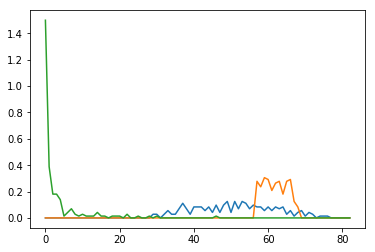

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(p_x_y0)

# Y为离散X为连续，需要对p(x|y)进行估计
**采用非参数估计方法统计p(x|y)，再考虑参数估计方法**

## 估计p(x|y)
###  数据源

**生成一组正态分布的随机数**

In [10]:
import numpy as np
import matplotlib.pyplot as plt #用于绘图的模块
np.random.seed(1234)    #设置随机种子
N = 200  #随机产生的样本量
bins = 20
randnorm = np.random.normal(size = N)   #生成正态随机数


### 进行统计

c:\users\wm\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


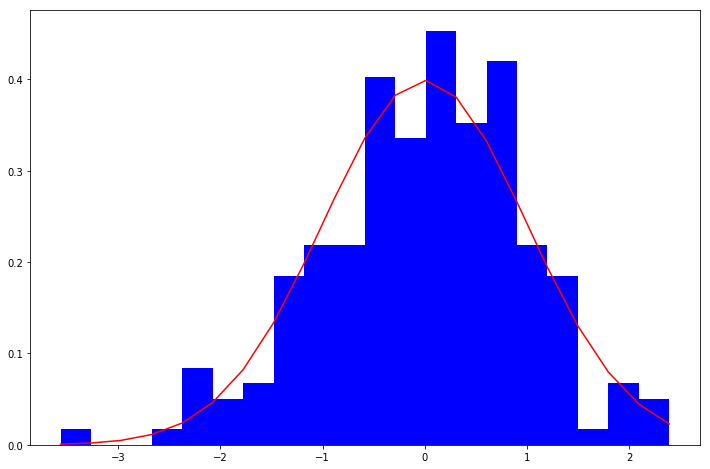

In [23]:
plt.figure(figsize=[12,8])
#直方图的个数用2个量级进行bins=sqrt(N)
#counts, bins, path = plt.hist(randnorm, bins = int(np.sqrt(N)), normed = True, color = 'blue')  #绘制直方图以上将直方图的频数和组距存放在counts和bins内。
counts, bins, path = plt.hist(randnorm, bins = bins, normed = True, color = 'blue')
#与正太分布密度函数进行比较
sigma = 1; mu = 0
norm_dist = (1/np.sqrt(2*sigma*np.pi))*np.exp(-((bins-mu)**2)/2)    #正态分布密度函数

plt.plot(bins,norm_dist,color = 'red') #绘制正态分布密度函数图
plt.savefig('filename.png',format='png')

### 估计概率密度函数

#### 方法1：使用scipy.optimize中的最小二乘拟合

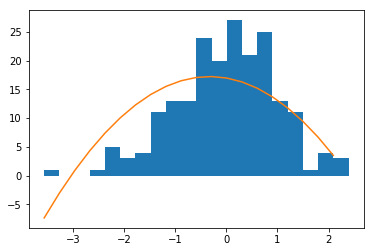

In [8]:
from scipy.optimize import leastsq


def func(x, p):
    return p[0] * np.square(x) + p[1] * x + p[2]

def residuals(p, x, y, reg):
    regularization = 0.1  # 正则化系数lambda
    ret = y - func(x, p)
    if reg == 1:
        ret = np.append(ret, np.sqrt(regularization) * p)
    return ret


cnt = plt.hist(randnorm, bins = bins)
x = cnt[1][0:20]
y = cnt[0]
reg=1
try:
    r = leastsq(residuals, [1, 1, 1], args=(x, y, reg))
    
except:
    print("Error - curve_fit failed")

y2 = [func(i, r[0]) for i in x]
plt.plot(x, y2)

In [9]:
r

(array([-2.34343957, -1.52455968, 16.96759754]), 1)

#### 方法2：在查阅一番以后，发现，对于这类函数拟合的话，from scipy.optimize import curve_fit这个对于高斯型、指数型函数拟合效果比较好 

In [10]:
from scipy.optimize import curve_fit
def func(x, a, b, c):  
    return a * np.exp(-b * x) + c  
def kde_sim(bins=bins):
    cnt = plt.hist(randnorm, bins=bins)
    x = cnt[1]
    y = cnt[0]
    popt, pcov = curve_fit(func, x[1:], y) # 问题的关键在这个func
    y2 = [func(i, popt[0], popt[1], popt[2]) for i in x]
    plt.figure()
    plt.plot(x, y2, 'r--')
    return popt

array([-1.45722836,  0.77337006, 14.38382791])

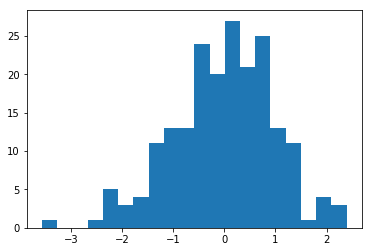

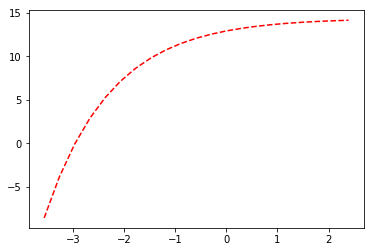

In [11]:
kde_sim()

In [8]:
bins

array([-3.56351666, -3.2657928 , -2.96806894, -2.67034508, -2.37262123,
       -2.07489737, -1.77717351, -1.47944965, -1.18172579, -0.88400193,
       -0.58627807, -0.28855421,  0.00916965,  0.3068935 ,  0.60461736,
        0.90234122,  1.20006508,  1.49778894,  1.7955128 ,  2.09323666,
        2.39096052])

#### 方法4：使用seaborn直接进行估计

In [12]:
import seaborn as sns

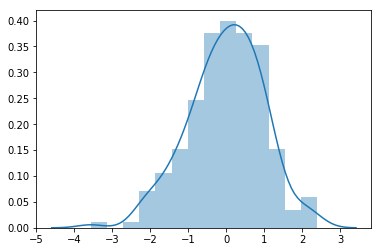

In [28]:
sns.distplot(randnorm)#kde = True调用了kdeplot

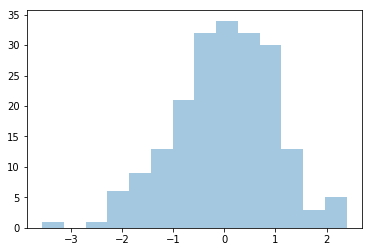

In [15]:
sns.distplot(randnorm,kde=False)

除了可以对曲线概率密度进行估计外，还可以使用指定函数进行拟合，但对于未知分布，效果不理想

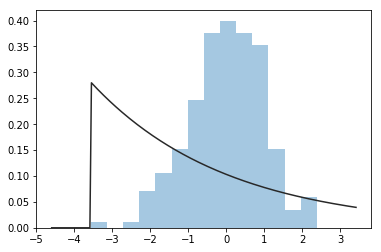

In [27]:
from scipy import stats
sns.distplot(randnorm,kde=False, fit=stats.expon)

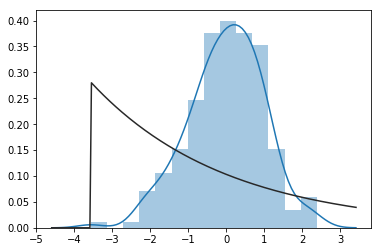

In [29]:
from scipy import stats
sns.distplot(randnorm, fit=stats.expon)#kde = True调用了kdeplot，使用expon进行拟合对比，显然kdeplot效果好

也可以使用kdeplot直接进行核密度估计

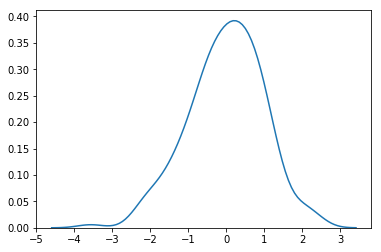

In [30]:
sns.kdeplot(randnorm,cut=0)

kdeplotd调用了_univariate_kdeplot
在_univariate_kdeplot中
```
        if kernel != "gau":
            kernel = "gau"
            msg = "Kernel other than `gau` requires statsmodels."
            warnings.warn(msg, UserWarning)
        if cumulative:
            raise ImportError("Cumulative distributions are currently"
                              "only implemented in statsmodels."
                              "Please install statsmodels.")
        x, y = _scipy_univariate_kde(data, bw, gridsize, cut, clip)
```
强制使用gau核，
最后调用

    x, y = _scipy_univariate_kde(data, bw, gridsize, cut, clip)
    
```
def _scipy_univariate_kde(data, bw, gridsize, cut, clip):
    """Compute a univariate kernel density estimate using scipy."""
    try:
        kde = stats.gaussian_kde(data, bw_method=bw)
    except TypeError:
        kde = stats.gaussian_kde(data)
        if bw != "scott":  # scipy default
            msg = ("Ignoring bandwidth choice, "
                   "please upgrade scipy to use a different bandwidth.")
            warnings.warn(msg, UserWarning)
    if isinstance(bw, string_types):
        bw = "scotts" if bw == "scott" else bw
        bw = getattr(kde, "%s_factor" % bw)() * np.std(data)
    grid = _kde_support(data, bw, gridsize, cut, clip)
    y = kde(grid)
    return grid, y
```

那么我们直接使用这些代码

In [4]:
from six import string_types
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt #用于绘图的模块
np.random.seed(1234)    #设置随机种子
N = 200  #随机产生的样本量
#bins = 20
#randnorm = np.random.normal(size = N)   #生成正态随机数
randnorm = np.random.exponential(size=N)  # lam为λ size为k 泊松分布
#randnorm = randnorm*1.0/max(randnorm)

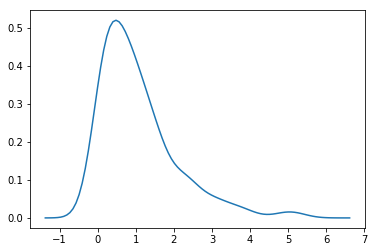

In [5]:
bw="scott"
data=randnorm
kde = stats.gaussian_kde(data, bw_method=bw)
if isinstance(bw, string_types):
    bw = "scotts" if bw == "scott" else bw
    bw = getattr(kde, "%s_factor" % bw)() * np.std(data)

clip = (-np.inf, np.inf)
gridsize = 100
cut = 4
support_min = max(data.min() - bw * cut, clip[0])
support_max = min(data.max() + bw * cut, clip[1])
grid = np.linspace(support_min, support_max, gridsize)
y = kde(grid)
x, y =grid, y
y = np.amax(np.c_[np.zeros_like(y), y], axis=1)
plt.plot(x,y)

14


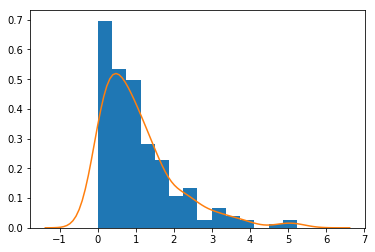

In [10]:
#Calculate number of hist bins using Freedman-Diaconis rule
def iqr(a):
    """Calculate the IQR(四分位距) for an array of numbers."""
    a = np.asarray(a)
    q1 = stats.scoreatpercentile(a, 25)
    q3 = stats.scoreatpercentile(a, 75)
    return q3 - q1
data=randnorm
if len(data)<2:
    bins = 1
h = 2 * iqr(data) / (len(data) ** (1 / 3))
if h == 0:
    bins = int(np.sqrt(data.size))
else:
    bins = int(np.ceil((data.max() - data.min()) / h))
plt.hist(data,bins=bins,density=True)
plt.plot(x,y)
print(bins)

In [6]:
?stats.scoreatpercentile()

In [18]:
randnorm

2125.986576184801

In [17]:
?kde

# 得到概率密度函数

In [20]:
from scipy import stats


In [23]:

bw = stats.gaussian_kde(randnorm).scotts_factor() * randnorm.std(ddof=1)
kde = stats.gaussian_kde(randnorm, bw_method=bw)

In [19]:
import numpy as np
a=np.array([1,2,3,4])
b=np.atleast_2d(a)

In [21]:
c=np.atleast_2d(b)
c.shape

(1, 4)

In [25]:
dataset = np.atleast_2d(a)
dataset[:, 2, np.newaxis] 

array([[3]])

In [2]:
import numpy as np

In [15]:
?plt.Figure